In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_dt = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'DecisionTreeClassifier')
data_rf = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'RandomForestClassifier')
data_knn = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'KNeighborsClassifier')
data_erlc = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'ERLC')

In [8]:
data_dt.head()

,Unnamed: 0,Accuracy,F1-Score,MCC,Training Time,Testing Time
0,0,0.913498,0.913425,0.910660,16.258458,0.006604
1,1,0.914264,0.914373,0.911387,19.327668,0.003139
2,2,0.905716,0.905824,0.902581,9.742313,0.002855
3,3,0.911712,0.911722,0.908823,9.502948,0.002746
4,4,0.911202,0.911306,0.908303,9.647490,0.003042


In [35]:
def get_metric(data_array, metric='Accuracy'):
    models = ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'ERLC' ]
    df = pd.DataFrame()
    for i in range(len(data_array)):
        print(i)
        temp = data_array[i]
        temp2 = temp[metric]
        df[models[i]] = temp2
        
    return df 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f12388f8400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f12388f8a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f12388f83d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1238883460>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f12388f8370>,
 'means': []}

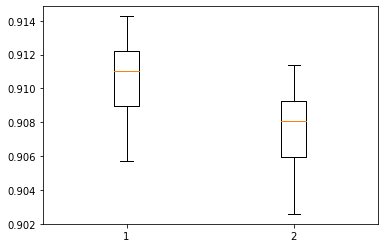

In [25]:
df1 = data_dt[['Accuracy','MCC']]
df1 = np.asarray(df1)
plt.boxplot(df1)

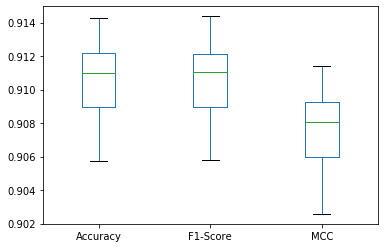

In [29]:
data_dt[['Accuracy','F1-Score','MCC']].plot.box()

In [38]:
acc = get_metric([data_dt, data_rf, data_knn, data_erlc])

0
1
2
3


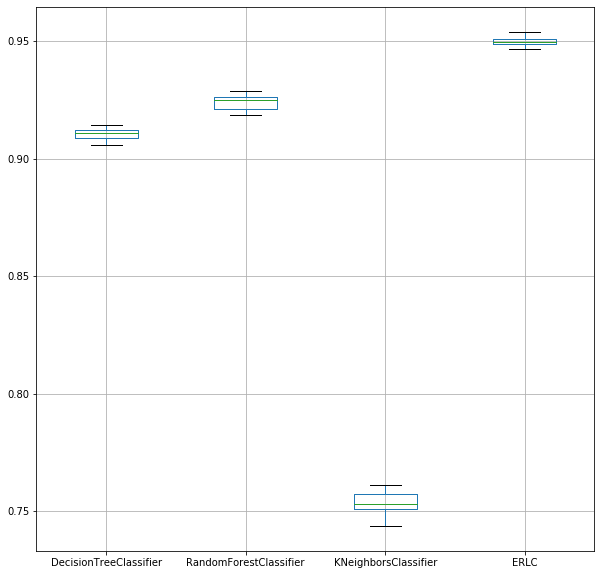

In [43]:
plt.figure(figsize = (10,10))
acc.boxplot()